In [1]:
from preprocess_data import *
from TDApipeline import *
from intensities_pipeline import *
from knn_pipeline import *
import scipy.io as sio
import os
import time  
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg as la
import numpy as np

def define_subject_dir(i_sub):
    """
    Creates the directory if it doesn't exist
    :param i_sub: subject id
    :return: directory path
    """
    res_dir = "results/intensities/subject_" + str(i_sub) +'/'
    if not os.path.exists(res_dir):
        print("create directory:", res_dir)
        os.makedirs(res_dir)
    return res_dir

def load_data(i_sub,space='both'):
    """
    Loads data from electrode space, font space 
    or both for a given subject
    :param i_sub: subject id
    :param space: electrode/font_space
    :return: data,directory path
    """
    subj_dir = define_subject_dir(i_sub)
    raw_data = sio.loadmat('data/dataClean-ICA3-'+str(i_sub)+'-T1.mat')
    
    if space=='electrodeSpace':
        elec_space=raw_data['dataSorted'] # [N,T,n_trials,motiv] 
        return elec_space,subj_dir
    elif space=='fontSpace':
        font_space=raw_data['ic_data3']
        return font_space,subj_dir
    else:
        elec_space=raw_data['dataSorted'] # [N,T,n_trials,motiv] 
        font_space=raw_data['ic_data3']
        return (elec_space,font_space),subj_dir,raw_data['indexM']

In [3]:
s,subj_dir=load_data(25,space='electrodeSpace')

In [4]:
electrodes_pos = np.load('results/intensities/xy_coord.npy')


In [5]:
electr_coord = pd.DataFrame(np.array([electrodes_pos[:, -1],
                                              electrodes_pos[:, 1].astype(float),
                                              electrodes_pos[:, 2].astype(float)]).T)


In [17]:
electr_coord['electrode_name']

0      Fp1
1      Fp2
2       F7
3       F3
4       Fz
5       F4
6       F8
7      FC5
8      FC1
9      FC2
10     FC6
11      T7
12      C3
13      Cz
14      C4
15      T8
16      F5
17     CP5
18     CP1
19     CP2
20     CP6
21      F6
22      P7
23      P3
24      Pz
25      P4
26      P8
27     PO9
28      O1
29      Oz
30      O2
31     FCz
32     AF7
33     AF3
34     AF4
35     AF8
36     POz
37      F1
38      F2
39     PO4
40     FT9
41     FT7
42     FC3
43     FC4
44     FT8
45    FT10
46      C5
47      C1
48      C2
49      C6
50     TP7
51     CP3
52     CPz
53     CP4
54     TP8
55      P5
56      P1
57      P2
58      P6
59     PO3
Name: electrode_name, dtype: object

In [8]:
subj_dir

'results/intensities/subject_25/'

NameError: name 'i' is not defined

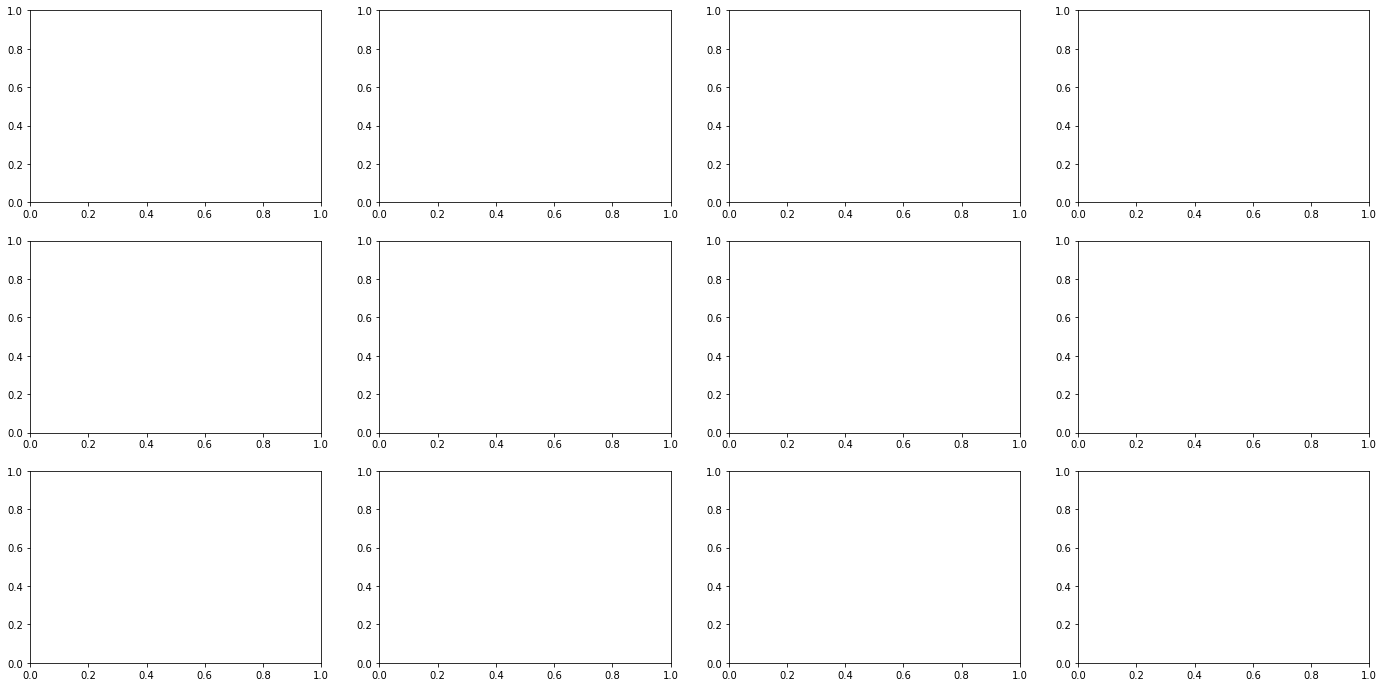

In [7]:
subjects=list(range(25,26)) 
bands=[-1,0,1,2] 
sessions=list(range(1,3))
spaces=['electrodeSpace','fontSpace']
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
for subj in subjects:
    silent_chan = np.load('results/intensities/subject_'+str(subj)+'/silent-channels-'+str(subj)+'.npy')
    electr_coord['is_silent'] = silent_chan
    electr_coord.columns = ['electrode_name', 'x', 'y', 'is_silent']
    for space in spaces:
        fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 12))
        plt.rcParams['xtick.labelsize']=18
        for i_band in range(3):
            for j in range(4):
                for ses in range(2):
                    print(np.load(subj_dir+space+'/'+band_dic[i_band]+'/session'+str(ses)+'/reprojected_means_m'+str(i)+'.npy').shape)
                    '''
                    mean=np.load(subj_dir+space+'/'+band_dic[i_band]+'/session'+str(ses)+'/reprojected_means_m'+str(i)+'.npy')
                    
                    mean_f=pd.DataFrame(np.concatenate((np.array(electr_coord['electrode_name'])[~silent_chan].reshape(-1,1), x.reshape(-1,1)),axis=1))
                    mean_df.columns = ['electrode_name', 'mean']
                    
                    plot_table=pd.merge(mean_df.assign(str_name=mean_df.electrode_name.astype(str)),
                                 electr_coord.assign(str_name=electr_coord.electrode_name.astype(str)),
                                 how='inner', on='electrode_name')[['electrode_name', 'is_silent', 'x', 'y',
                                                              'mean']]
                    
                    x = np.array(plot_table.x).astype(float)
                    xs = np.array(plot_table[plot_table.is_silent].x).astype(float)
                    y = np.array(plot_table.y).astype(float)
                    ys = np.array(plot_table[plot_table.is_silent].y).astype(float)
                    z = np.array(plot_table['mean']).astype(float)
                    
                    grid_x, grid_y = np.mgrid[-8:8:100j, -9:10:200j]
                    
                    points = np.array([x, y]).T
                    silent_points = np.array([xs, ys]).T
                    values = z

                    # interpolate
                    zi = griddata(points, values, (grid_x, grid_y), method='cubic') if session_sufix == '' else \
                        griddata(points, values, (grid_x, grid_y), method='linear')

                    # plot
                    plt.subplot(111)
                    
                    plt.imshow(zi.T, extent=(-8.1, 8.1, -9.1, 10.1), origin='lower')
                    
                    plt.plot(points[:, 0], points[:, 1], 'x', ms=5, c='grey')
                    plt.plot(silent_points[:, 0], silent_points[:, 1], 'o', ms=5, c='white')
                    plt.colorbar()
                    plt.clim(0, 0.09)
                    plt.show()'''

In [34]:
x=np.random.rand(42)

x.shape

(42,)

In [28]:
~silent_chan

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [43]:
names=np.array(electr_coord['electrode_name'])
names=np.array(electr_coord['electrode_name'])[~silent_chan].reshape(-1,1)
names.shape

(42, 1)

In [48]:
prova=pd.DataFrame(np.concatenate((names, x.reshape(-1,1)),axis=1))
prova.columns = ['electrode_name', 'mean']


In [51]:
pd.merge(prova.assign(str_name=prova.electrode_name.astype(str)),
                                 electr_coord.assign(str_name=electr_coord.electrode_name.astype(str)),
                                 how='inner', on='electrode_name')[['electrode_name', 'is_silent', 'x', 'y',
                                                              'mean']]

,electrode_name,is_silent,x,y,mean
0,Fp1,False,-0.485328,1.493835,0.621165
1,Fp2,False,0.485501,1.493884,0.199683
2,F7,False,-1.270781,0.923319,0.479462
3,F3,False,-0.652084,0.812357,0.285096
4,Fz,False,0.0,0.785398,0.781399
5,F4,False,0.652084,0.812357,0.53584
6,F8,False,1.270781,0.923319,0.278715
7,T7,False,-1.570796,0.0,0.103346
8,C4,False,0.785398,0.000111,0.122867
9,F5,False,-1.596877,1.3295,0.883649
